In [50]:
import os
from pathlib import Path
from aocd.models import Puzzle
import collections
import numpy as np
import re
from statistics import median, mean
import math
import queue
import itertools
import more_itertools
infinite_defaultdict = lambda: collections.defaultdict(infinite_defaultdict)
from copy import copy
import functools
import heapq
import operator
from tqdm.notebook import trange, tqdm
import networkx as nx
import pprint
import bisect
import scipy as sp
from scipy import ndimage
import matplotlib.pyplot as plt


In [51]:
os.environ['AOC_SESSION'] = '53616c7465645f5f08d795ada87fdaa821937db93593e55408b837c7c3a8488c30508f44853548c94060e564038da7c3f983c9db6d52d939c0b3972f80db50c7'

In [52]:
year = 2025

# Day 1

In [ ]:
puzzle = Puzzle(year, 1)

In [ ]:
puzzle.input_data

In [ ]:
test = """L68
L30
R48
L5
R60
L55
L1
L99
R14
L82"""

## Part 1 

In [ ]:
def d1_parta(data, dial = 50):
    match = 0
    for line in data.split("\n"):
        command, value = line[0], int(line[1:])
    
        match command:
            case "L":
                dial -= value
            case "R":
                dial += value
    
        dial %= 100
        match += dial == 0
            
    return match
            
    

In [ ]:
d1_parta(test)

In [ ]:
res_a = d1_parta(puzzle.input_data)
res_a

In [ ]:
puzzle.answer_a = res_a

## Part 2

In [ ]:
def d1_partb(data, dial = 50):
    match = 0
    for line in data.split("\n"):
        command, value = line[0], int(line[1:])
        match += value // 100
    
        match command:
            case "L":
                new_dial = (dial - value) % 100
                if dial != 0 and (new_dial > dial or new_dial == 0):
                    match += 1
            case "R":
                new_dial = (dial + value) % 100
                if new_dial < dial : 
                     match += 1
                    
        dial = new_dial
            
    return match
            
    

In [ ]:
test2 = """R1050"""
d1_partb(test2)

In [ ]:
d1_partb(test)

In [ ]:
res_b = d1_partb(puzzle.input_data)
res_b

In [ ]:
puzzle.answer_b = res_b

# Day 2

In [ ]:
puzzle = Puzzle(year, 2)

In [ ]:
data_test = """11-22,95-115,998-1012,1188511880-1188511890,222220-222224,1698522-1698528,446443-446449,38593856-38593862,565653-565659,824824821-824824827,2121212118-2121212124"""

In [ ]:
def invalid_id(value):
    value = str(value)
    length = len(value) // 2
    return value[:length] == value[length:]

def next_value(value):
    value = str(value)
    length = len(value)
    if length % 2 == 1:
        half_value = "1" + length // 2 * "0" 
    else:
        first_half = int(value[:length//2])
        second_half = int(value[length//2:])
        
        half_value = first_half
        if first_half <= second_half : 
            half_value += 1
            
        half_value = str(half_value)
        
    return int(half_value * 2)

def day2_parta(data):
    res = 0
    for r in data.split(","):
        x, y = map(int, r.split("-"))
        while x <= y:
            if invalid_id(x):
                res += x
                
            x = next_value(x)
    
    return res
        

In [ ]:
day2_parta(data_test) == 1227775554

## Part 1 

In [ ]:
res_a = day2_parta(puzzle.input_data)

In [ ]:
puzzle.answer_a = res_a

## Part 2

In [ ]:
def invalid_id(value):
    value = str(value)
    new_value = value
    for _ in range(len(value) // 2):
        new_value = new_value[1:] + new_value[0]
        if value == new_value:
            return True
        
    return False

def day2_partb(data):
    res = 0
    for r in data.split(","):
        x, y = map(int, r.split("-"))
        while x <= y:
            if invalid_id(x):
                res += x
            x += 1         
    
    return res
        

In [ ]:
day2_partb(data_test)

In [ ]:
res_b = day2_partb(puzzle.input_data)
res_b

In [ ]:
puzzle.answer_b = res_b

# Day 3

In [ ]:
puzzle = Puzzle(year, 3)

In [ ]:
data_test = """987654321111111
811111111111119
234234234234278
818181911112111"""

## Part 1 

In [42]:
def day3_part1(data):
    res = 0

    for line in data.splitlines():
        
        x1, x10 = line[-1], line[-2]
        potential_max_x1 = x1

        for x in reversed(line[:-2]):
            if x >= x10:
                x10, x = x, x10
                x1 = max(potential_max_x1, x1, x)
                potential_max_x1 = x1
            elif potential_max_x1 <= x:
                potential_max_x1 = x
            
        res += int(x10 + x1)

    return res
        

In [43]:
day3_part1(data_test)

357

In [ ]:
res_a = day3_part1(puzzle.input_data)
res_a

In [ ]:
puzzle.answer_a = res_a

## Part 2

In [ ]:
list(reversed(range(15)))

In [ ]:
list(range(15))[:15-12]

In [64]:
def find_max(value, nb_to_find=12):
    for j in reversed(range(nb_to_find)):
        max_char = max(value[:len(value) - j])
        value = value[value.index(max_char) + 1:]
        
        yield max_char

def day3_part2(data):
    return sum(int("".join(find_max(line))) for line in data.splitlines())

In [65]:
day3_part2(data_test) == 3121910778619

True

In [66]:
res_b = day3_part2(puzzle.input_data)
res_b

171846613143331

In [60]:
puzzle.answer_b = res_b

# Day 4

In [53]:
puzzle = Puzzle(year, 4)

In [31]:
data_test = """..@@.@@@@.
@@@.@.@.@@
@@@@@.@.@@
@.@@@@..@.
@@.@@@@.@@
.@@@@@@@.@
.@.@.@.@@@
@.@@@.@@@@
.@@@@@@@@.
@.@.@@@.@."""

In [87]:
def create_grid_with_diagonals(data):
    array = np.array(list(map(list, data.splitlines())))
    rows, cols = array.shape
    graph = nx.grid_2d_graph(rows, cols)
    
    # Add diagonal edges
    for i in range(rows - 1):
        for j in range(cols - 1):
            graph.add_edge((i, j), (i + 1, j + 1))  # down-right
            graph.add_edge((i + 1, j), (i, j + 1))  # down-left

    for node, value in np.ndenumerate(array):
        graph.nodes[node]["value"] = value
        
    for n1, n2 in list(graph.edges):
        if graph.nodes[n1]["value"] == "." or graph.nodes[n2]["value"] == ".":
            graph.remove_edge(n1, n2)
    
    return graph

In [88]:
def plot_graph(graph):
    pos = {(i, j): (j, -i) for i, j in graph.nodes()}
    labels = nx.get_node_attributes(graph, 'value')
    nx.draw(graph, pos, labels=labels, with_labels=True, node_color='lightblue', node_size=700, font_size=10)
    plt.show()

## Part 1 

In [89]:
def day4_part1(data, plot=False):
    graph = create_grid_with_diagonals(data)
    if plot:
        plot_graph(graph)
    return sum(len(graph.edges(node)) < 4 and data["value"] == "@" for node, data in graph.nodes(data=True))

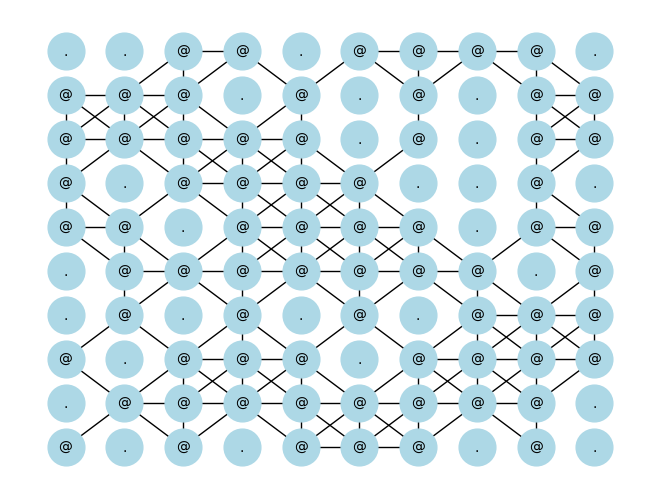

13

In [90]:
day4_part1(data_test, True)

In [91]:
answer_a= day4_part1(puzzle.input_data)

In [92]:
puzzle.answer_a = answer_a

## Part 2

In [93]:
def day4_part2(data, plot=False):
    graph = create_grid_with_diagonals(data)
    res = 0
    while True:
        if plot:
            plot_graph(graph)
    
        nodes_to_remove = set(node for node, data in graph.nodes(data=True) if len(graph.edges(node)) < 4 and data["value"] == "@")
        

        for node in nodes_to_remove:
            graph.remove_edges_from(set(graph.edges(node)))
            graph.nodes[node]["value"] = "x"
        
        if len(nodes_to_remove) == 0:
            return res

        res += len(nodes_to_remove)    
    
   

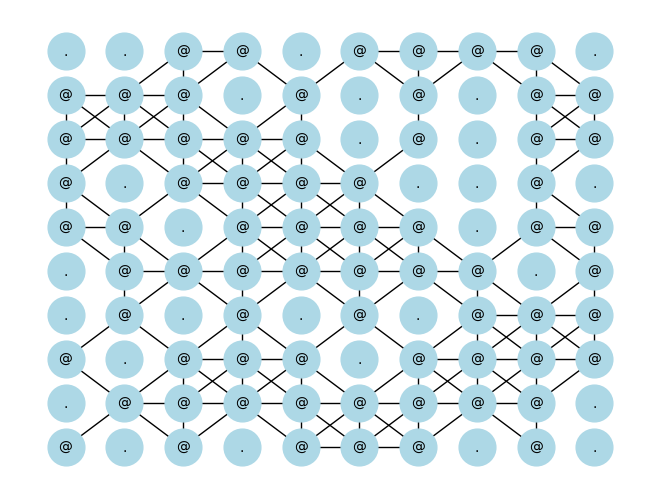

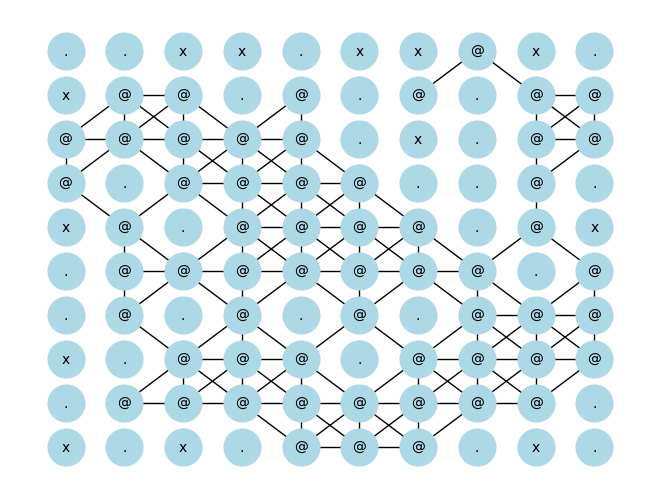

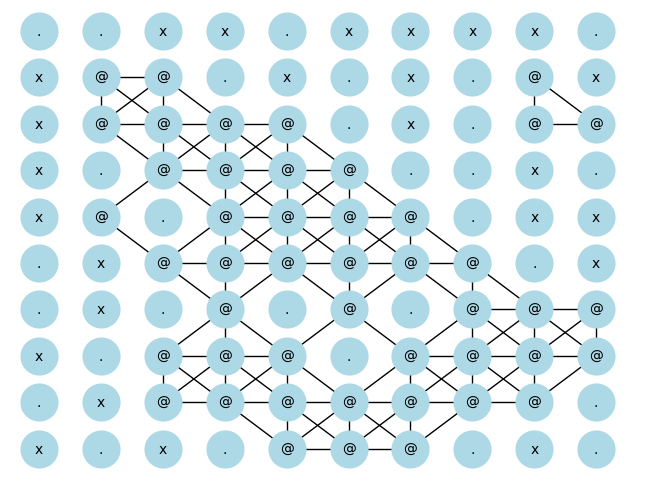

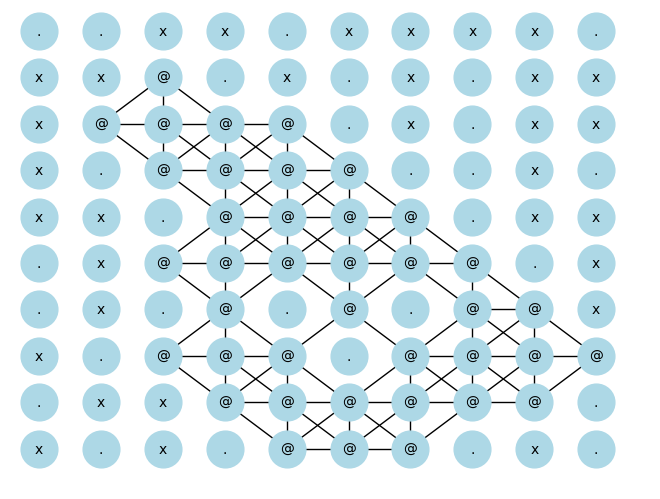

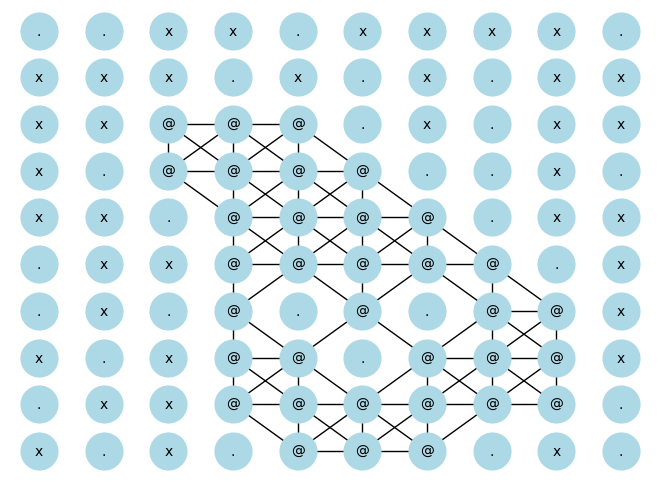

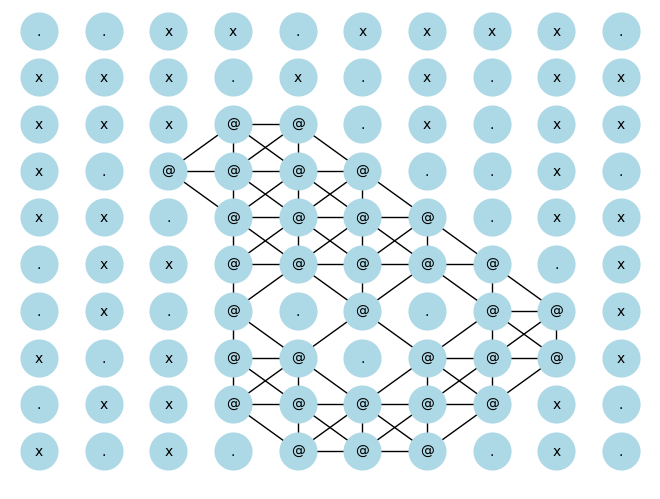

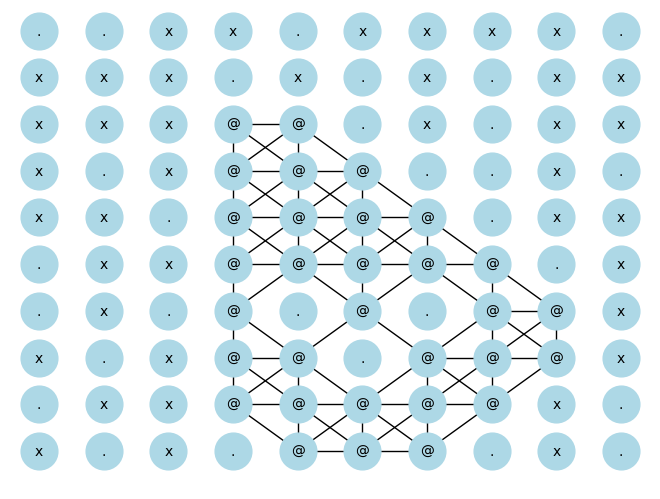

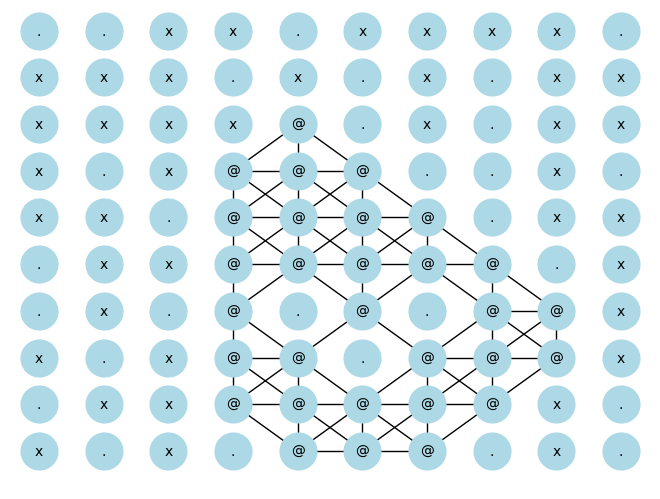

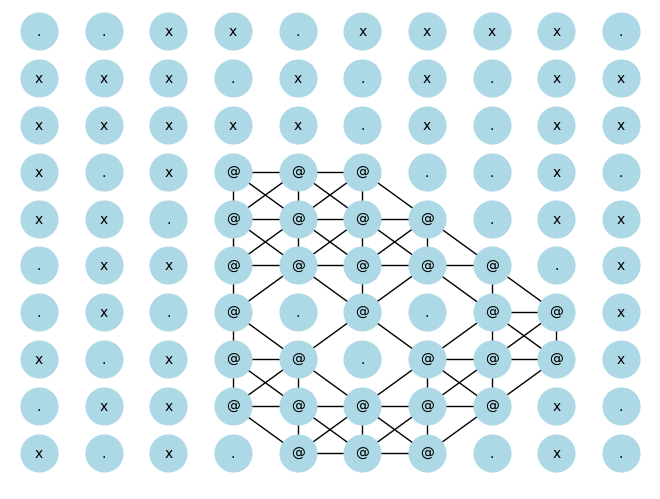

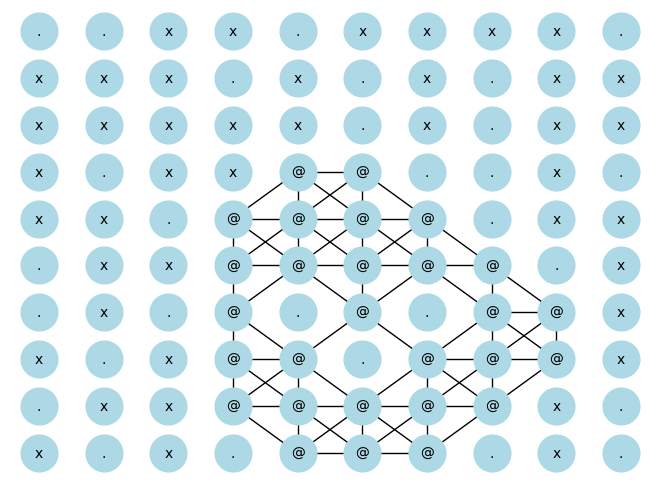

43

In [94]:
day4_part2(data_test, True)

In [81]:
answer_b = day4_part2(puzzle.input_data)

In [82]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to decorating the North Pole.You have completed Day 4! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 5

In [ ]:
puzzle = Puzzle(year, 5)

## Part 1 

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
puzzle.answer_b = answer_b

# Day 6

In [ ]:
puzzle = Puzzle(year, 6)

## Part 1 

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
puzzle.answer_b = answer_b

# Day 7

In [ ]:
puzzle = Puzzle(year, 7)

## Part 1 

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
puzzle.answer_b = answer_b

# Day 8

In [ ]:
puzzle = Puzzle(year, 8)

## Part 1 

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
puzzle.answer_b = answer_b

# Day 9

In [ ]:
puzzle = Puzzle(year, 9)

## Part 1 

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
puzzle.answer_b = answer_b

# Day 10

In [ ]:
puzzle = Puzzle(year, 10)

## Part 1 

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
puzzle.answer_b = answer_b

# Day 11

In [ ]:
puzzle = Puzzle(year, 11)

## Part 1 

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
puzzle.answer_b = answer_b

# Day 12

In [ ]:
puzzle = Puzzle(year, 12)

## Part 1 

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
puzzle.answer_b = answer_b